# Diabet Disease


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.Outcome.value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

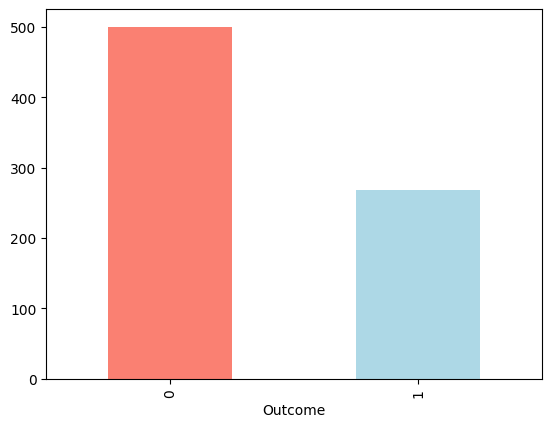

In [5]:
df.Outcome.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

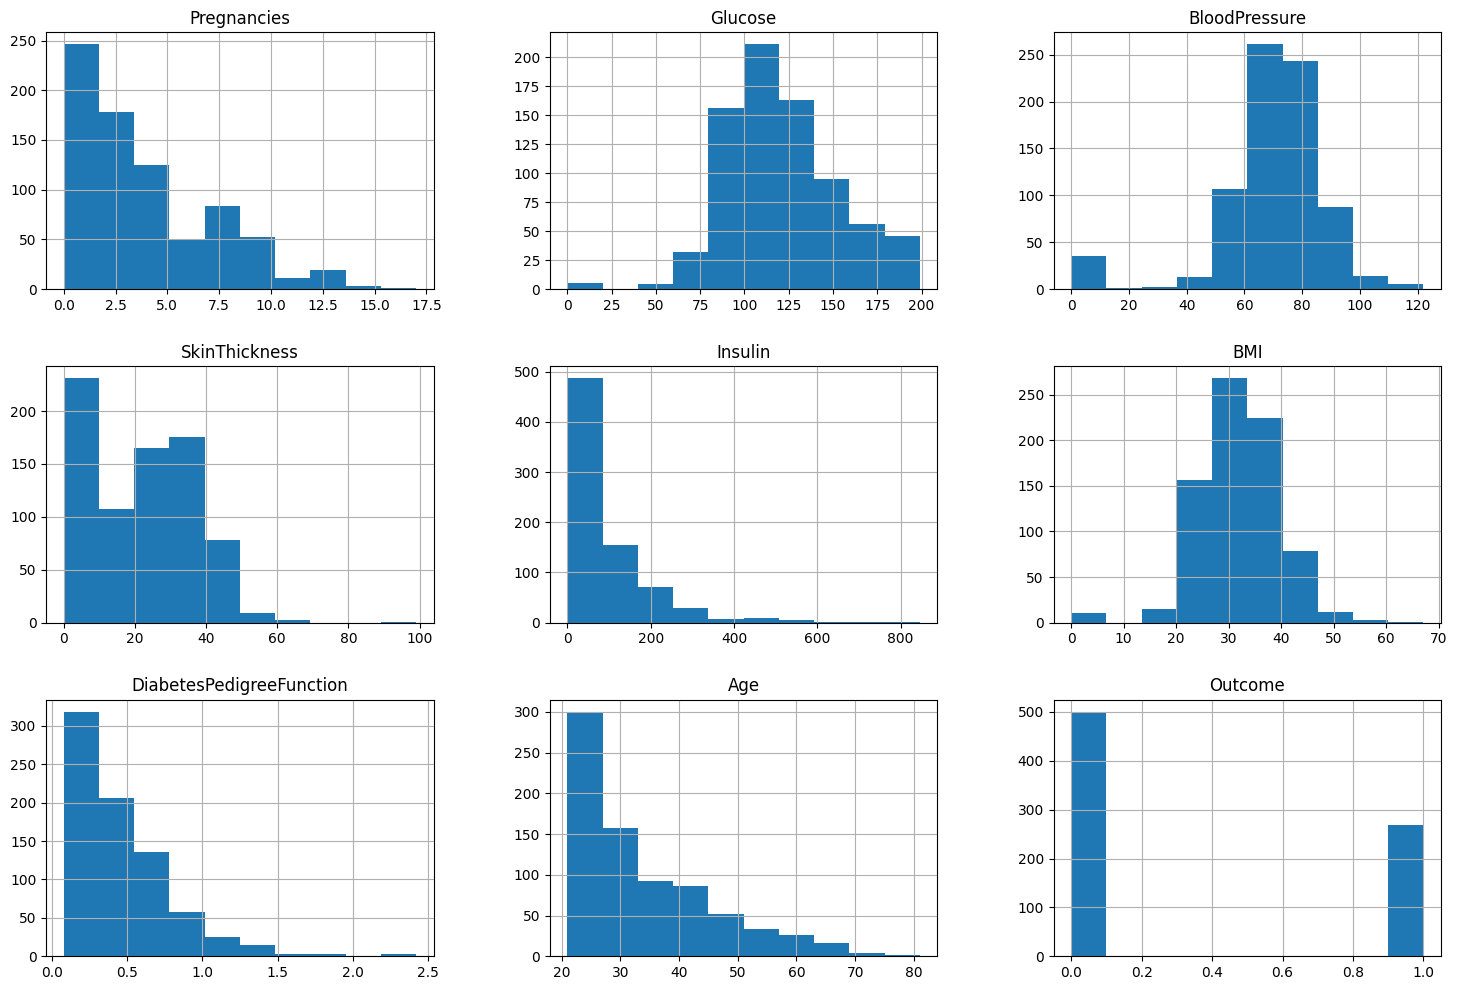

In [7]:
df.hist(figsize=(18,12));

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


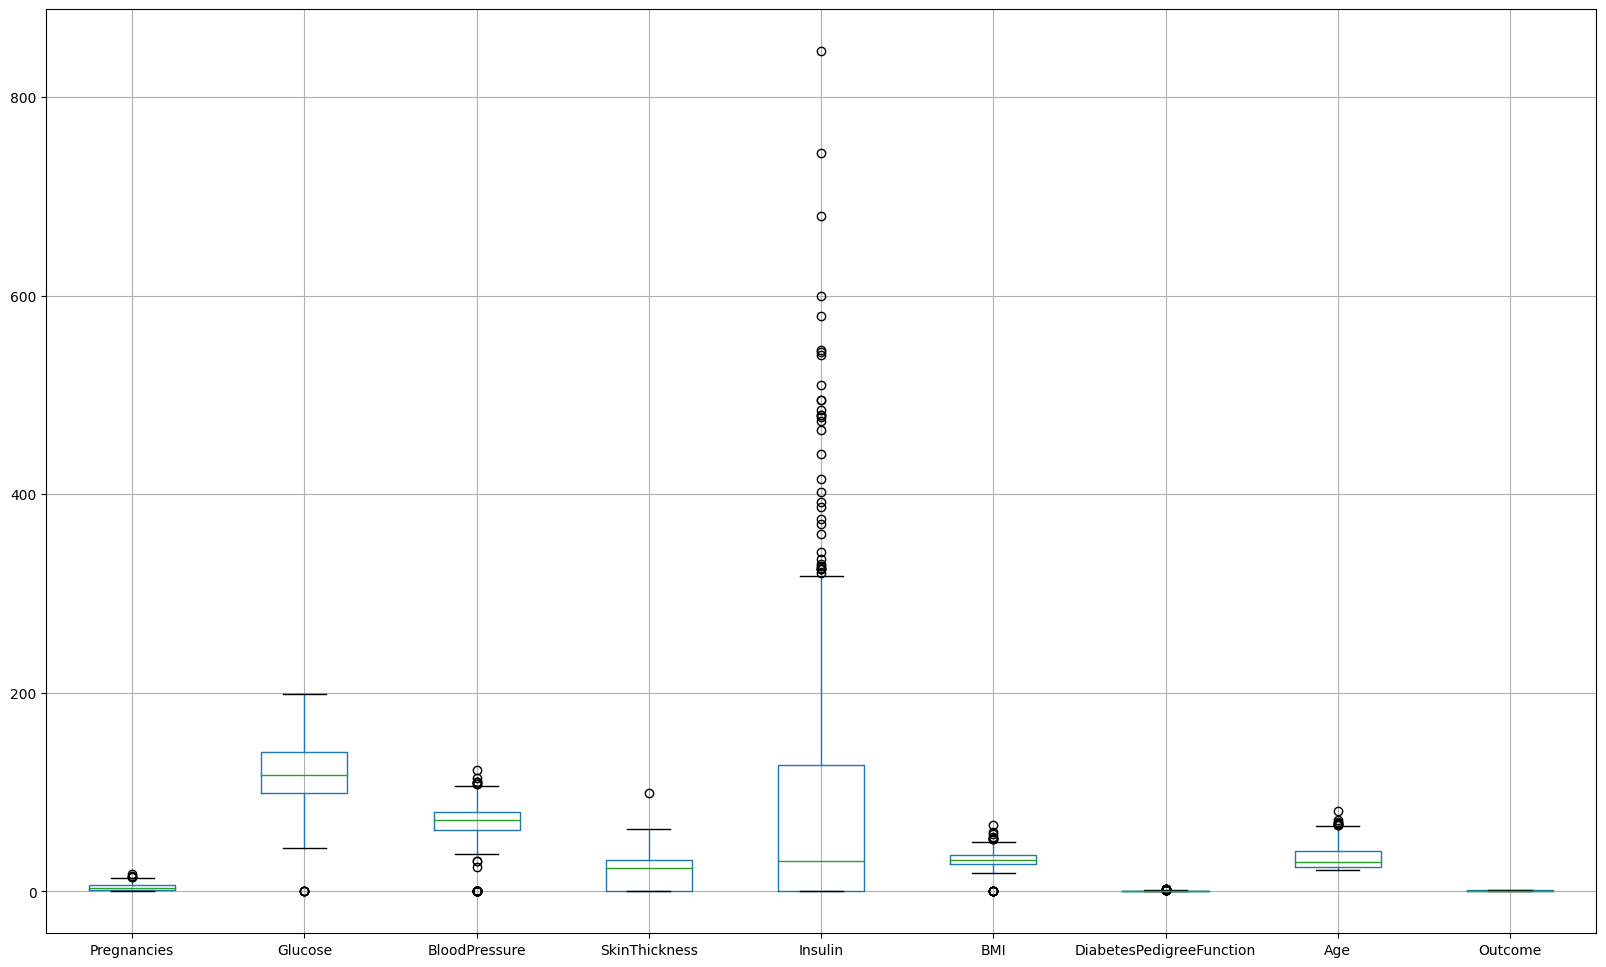

In [9]:
df.boxplot(figsize=(20,12));

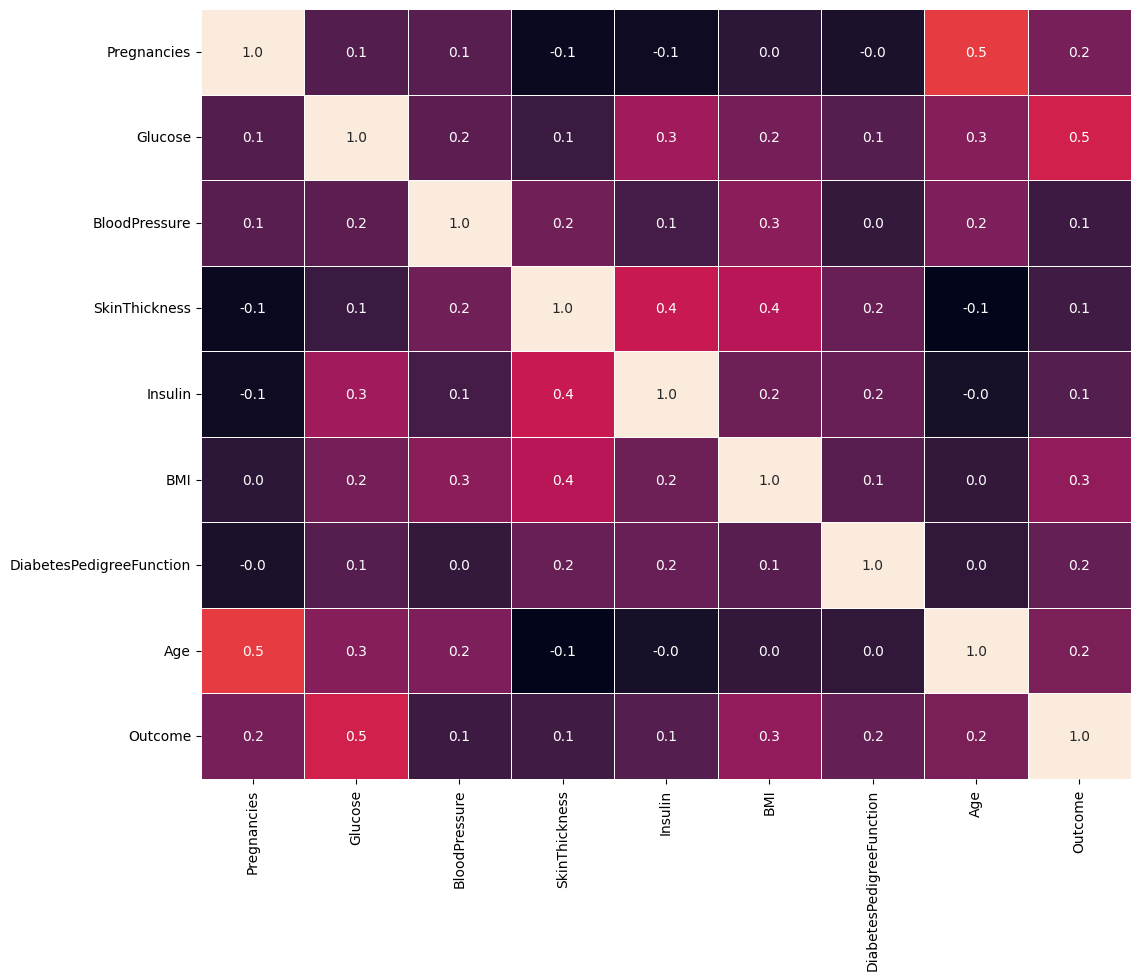

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', cbar=False);

In [11]:
   from imblearn.over_sampling import RandomOverSampler

In [12]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [13]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 500, 1: 268})


In [14]:
X.shape

(768, 8)

In [15]:
os =  RandomOverSampler()
X, y = os.fit_resample(X, y)

In [16]:
print('Resampled dataset shape %s' % Counter(y))

Resampled dataset shape Counter({1: 500, 0: 500})


In [17]:
X.shape

(1000, 8)

In [18]:
df = X
df['Outcome'] = y
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
len(df)

1000

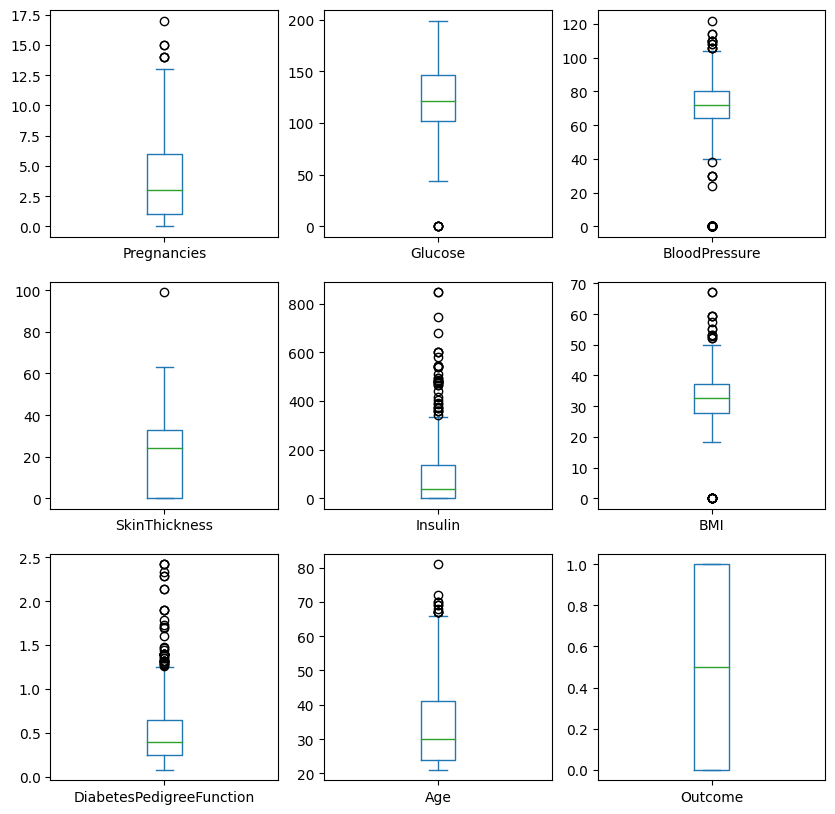

In [20]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False,sharey=False ,figsize =(10,10));

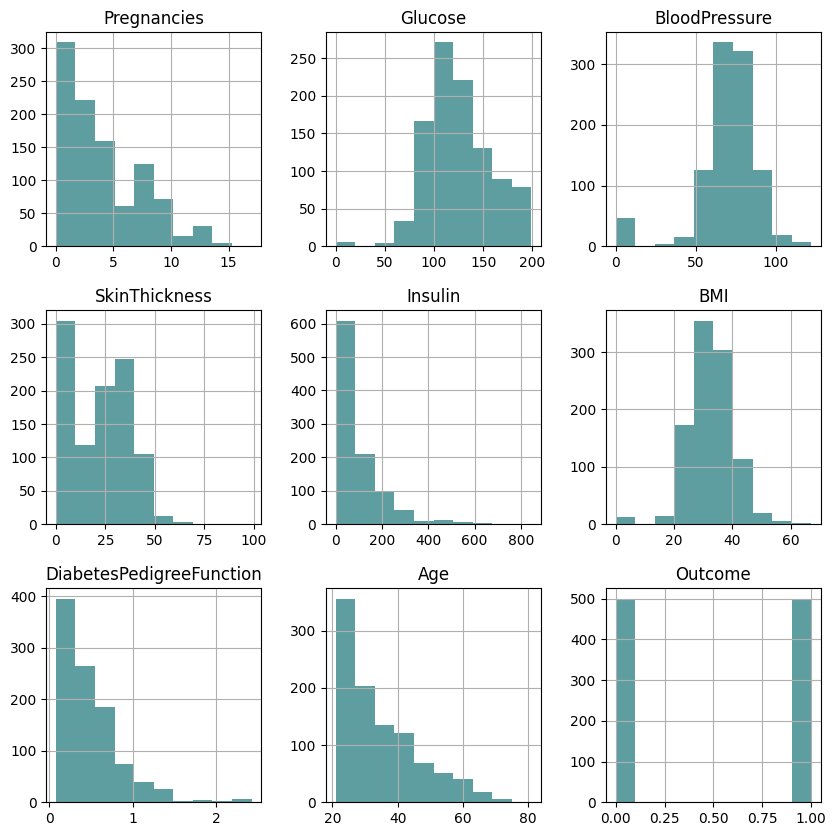

In [21]:
df.hist(figsize = (10,10), color = "#5F9EA0");

In [22]:
def Boundary_skew(feature, name):
    
    '''
    We use below method if feature is a skewed
    
    '''

    IQR = feature.quantile(0.75)-feature.quantile(0.25)
    
    
    lower_bridge=feature.quantile(0.25)-(IQR*1.5)
    upper_bridge=feature.quantile(0.75)+(IQR*1.5)
    
    #### Extreme outliers
#     lower_bridge=df['Insulin'].quantile(0.25)-(IQR*3)
#     upper_bridge=df['Insulin'].quantile(0.75)+(IQR*3)
    
    print(name), print(lower_bridge), print(upper_bridge), print(10*'-')

In [23]:
def Boundary_GD(feature, name):
    '''
    We use below method if follow a Gaussian Distribution
    
    ''' 

#     uppper_boundary=feature.mean() + 3* feature.std()
#     lower_boundary=feature.mean() - 3* feature.std()
    
    uppper_boundary=feature.mean() + feature.std()
    lower_boundary=feature.mean() - feature.std()
    print(name), print(lower_boundary), print(uppper_boundary),print(feature.mean())
    print(10*'-')

In [24]:
Boundary_skew(df.Insulin, 'Insulin')
Boundary_skew(df.DiabetesPedigreeFunction, 'DiabetesPedigreeFunction')
Boundary_skew(df.Age, 'Age')

Insulin
-202.5
337.5
----------
DiabetesPedigreeFunction
-0.35050000000000003
1.2535
----------
Age
-1.5
66.5
----------


In [25]:
df.loc[df['Insulin']>=318,'Insulin']=318
df.loc[df['DiabetesPedigreeFunction']>=1.2,'DiabetesPedigreeFunction']=1.2
df.loc[df['Age']>=66,'Age']=66

In [26]:
Boundary_GD(df.BloodPressure, 'BloodPressure')
Boundary_GD(df.BMI, 'BMI')

BloodPressure
49.992044791358424
89.16995520864158
69.581
----------
BMI
24.75617488693991
40.638625113060094
32.6974
----------


In [27]:
df.loc[df['BloodPressure']>=88,'BloodPressure']=88
df.loc[df['BMI']>=40,'BMI']=40

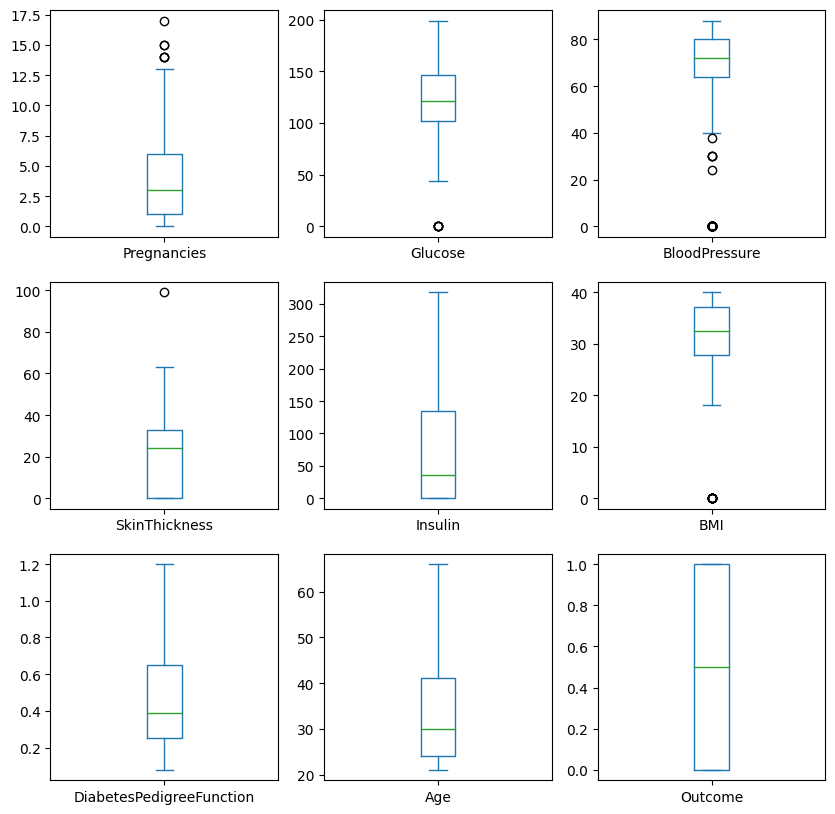

In [28]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False,sharey=False ,figsize =(10,10));

### Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Outcome'], axis=1), df.Outcome, random_state=42)

In [30]:
X_train.shape, X_test.shape

((750, 8), (250, 8))

In [31]:
def model_with_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [32]:
models = {"RandomForest": RandomForestClassifier(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression()}

model_scores = model_with_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores 

c:\Users\Vinay\Documents\Physician.Ai\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForest': 0.8, 'KNN': 0.648, 'SVC': 0.732, 'LogisticRegression': 0.764}

In [33]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)

# Define a grid of hyperparameters
grid = {"n_estimators": [10, 100, 200, 500, 1000],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

rs_RFC = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                param_distributions=grid,
                                n_iter=5,
                                verbose=True)

rs_RFC.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\Users\Vinay\Documents\Physician.Ai\venv\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Vinay\Documents\Physician.Ai\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Vinay\Documents\Physician.Ai\venv\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Vinay\Documents\Physician.Ai\venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_pa

In [34]:
rs_RFC.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [35]:
model = RandomForestClassifier( n_estimators=200,
                                max_depth=30)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=200)

### Checking the accuracy

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)
print(f'Accuracy-Score: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

Accuracy-Score: 0.78
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       124
           1       0.76      0.83      0.79       126

    accuracy                           0.78       250
   macro avg       0.79      0.78      0.78       250
weighted avg       0.79      0.78      0.78       250



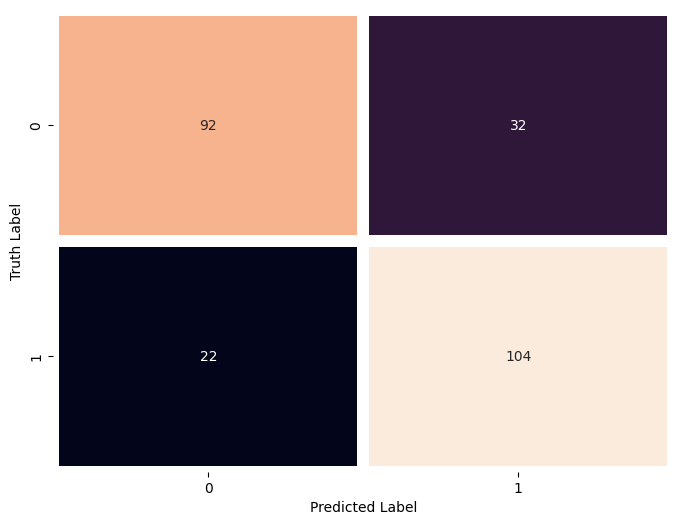

In [37]:
import seaborn as sns
c_m = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(c_m, annot=True, linewidths=8.5 , fmt= '', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [38]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model ,X_test, y_test);

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (c:\Users\Vinay\Documents\Physician.Ai\venv\Lib\site-packages\sklearn\metrics\__init__.py)

In [39]:
import joblib
joblib.dump(model, 'diabetes_model.pkl')

['diabetes_model.pkl']